# アイスクリーム統計学 with Python 第8章

第１２回講義（2017年11月3日講義、11月7日課題提出締切）

このページは、<a href="http://kogolab.chillout.jp/elearn/icecream/index.html" target="_blank">アイスクリーム統計学にようこそ！</a>の内容をプログラミング言語 Python に合わせて書き直したものです（著作権者の許諾を得て利用しております）。

<h1 STYLE="background: #c2edff;padding: 0.5em;"><a href="http://kogolab.chillout.jp/elearn/icecream/chap8/sec0.html" target="_blank">第８章 因子分析(1)</a></h1>

<P class="photo"><img src="image/icecream.jpg" width="172" height="179"></P>
<P>21種類のアイスクリームをうまく分類して、新メニューのためのヒントを得ようとしている店長です。</P>
<P class="photo"><img src="image/tencho-futsu.jpg" width="130" height="145"></P>
<P class=speech>「なるほど、相関行列をよく検討すればアイスクリームの分類ができるんだね」</P>
<P class=speech>───そうなんです、店長。たとえば、マカダミアナッツとウォールナッツとアーモンドのアイスクリームはお互いに相関係数が高いですから、ひとつのグループとして考えることができますね。「ナッツ系」というような名前がつけられますね。</P>
<P class=speech>「アンケートに答えた人にしてみれば、それぞれの種類のアイスクリームの好き嫌いを答えているに過ぎないんだけど、そういうアンケートをたくさん集めて分析すれば、自然にアイスクリーム全体の構造がわかってくるというわけだ」</P>
<P class=speech>───そういうことになりますね。うーん、統計学ってすごいですね。</P>
<P class=speech>「でも、相関行列が大きくなると、相関係数を見るだけでも大変だよね。それに、相関係数がゼロに近いものについては、なにも言えない」</P>
<P class=speech>───そうですね。</P>
<P class=speech>「21種類のアイスクリームが、地図のように配置できたら全体像がよくわかると思うんだけど、そういうことはできないの？」</P>
<P class=speech>───地図ですか？　うーん……</P>

<h2 STYLE="background: #c2edff;padding: 0.5em;"><a href="http://kogolab.chillout.jp/elearn/icecream/chap8/sec1.html" target="_blank">8.1　因子分析の考え方</a></h2>

<P class="photo"><img src="image/aiko-kangaekomu.jpg" width="150" height="137"></P>
<P class="speech">───21種類のアイスクリームを地図のように配置するのか……。確かに相関行列だけでは、一目で見てわかりやすいということにはならないわね。どうしたらいいのかしら。</P>
<P class="speech">「どうしたのアイ子ちゃん。むずかしい顔をして」</P>
<P class="speech">───あ、三ヶ島先輩。アイスクリームの好みについての相関行列まではできたんですけれど、これではまだわかりにくいので、地図のようにできないか、と店長がおっしゃるんですよ。</P>
<P class="speech">「なるほど。そのためには、因子分析を使えばいいんだよ」</P>
<P class="speech">───因子分析ですか？　うわー、なんか難しそうですね。</P>
<P class="speech">「変数がたくさんある、多変量データを分析する方法はいろいろあるけれども、因子分析はその中でも最もよく使われるもののひとつだ。これをマスターしておくと、これからきっと役に立つことがあると思うよ」</P>
<P class="speech">───三ヶ島先輩、ぜひ、それを教えてください。</P>

<h4 style="border-bottom: solid 1px black;">因子分析の考え方</h4>
<P class="photo"><img src="image/senpai-futsu.jpg" width="152" height="127"></P>
<P>まず最初に、因子分析の考え方を説明しよう。</P>
<P>ここでは簡単のために、21種類のアイスクリームから、マカダミアナッツ、チョコレート、ウォールナッツ、チョコチップの4種類のアイスクリームのデータだけを考えることにするよ。</P>
<P>この4種類の相関行列は、こうなっている。</P>
<P class="photo"><img src="image/factor1.jpg" width="330" height="95"></P>
<P>マカダミアナッツとウォールナッツの相関が高くて、チョコレートチョコチップの相関も高い。</P>
<P>この現象について、因子分析では、マカダミアナッツとウォールナッツに対してひとつの因子が共通に働いていると考える。同様に、チョコレートチョコチップにもまた別の因子が共通に働いていると考える。この因子のことを「<em>共通因子</em>」と呼んでいる。イメージにするとこうなる。</P>
<P class="photo"><img src="image/factor2.jpg" width="569" height="203"></P>
<P>「ナッツの共通因子」というものがあるとすれば、それがマカダミアナッツとウォールナッツに働いているので、マカダミアナッツとウォールナッツの相関が高くなるという考え方だ。同様に、「チョコの共通因子」というものがあるとすれば、それがチョコレートとチョコチップに働いているので、チョコレートとチョコチップの相関が高くなるわけだ。</P>
<P>共通因子に対して、マカダミアナッツやチョコレートの好みなどの変数を「<em>観測変数</em>」と呼んでいる。実際に観測されたデータという意味だ。</P>
<P class="photo"><img src="image/aiko-fushigi.jpg" width="148" height="128"></P>
<P class="speech">───共通因子と観測変数の関係は、前にやった偏相関にちょっと似ていますね。</P>
<P class="speech">「そうだね。偏相関の場合は、共通因子も実際に観測されたデータだったけれども、この３つの変数の関係は偏相関に似ている。つまり、共通因子があるために、それが働いている観測変数同士の相関が高くなる、という考え方だ」</P>
<P class="speech">───でも、因子分析では、共通因子は実際のデータではないんですね。</P>
<P class="speech">「そうだ。あくまでも仮想的なものだよ。そして、その共通因子を求めることが因子分析という統計手法なんだ」</P>

<h2 STYLE="background: #c2edff;padding: 0.5em;"><a href="http://kogolab.chillout.jp/elearn/icecream/chap8/sec2.html" target="_blank">8.2　固有値</a></h2>

<P class="photo"><img src="image/aiko-ganbaru.jpg" width="181" height="133"></P>
<P class="speech">───それじゃ、さっそく因子分析の計算の仕方を教えてください。Excelとかでできるんですよね？</P>
<P class="speech">「アイ子ちゃん、残念ながら、基本的なExcelでは、因子分析は計算できないんだ。いろいろな値を推定するために繰り返し計算が必要なので、かなり複雑な計算になるから」</P>
<P class="speech">───え？　じゃあ、どうしたらいいんですか？</P>
<P class="speech">「因子分析を実行するためには、統計ソフトと呼ばれるアプリケーションソフトを使う必要がある。広く使われている統計ソフトとしては、SPSSやSASが有名だ。ただし個人で買うにはちょっと値段が高い。その他には、Excelのアドイン（付加的なプログラム）として統計ソフトが販売されている。また、最近ではWeb上で統計解析ができるようなサイトも出てきているよ」</P>
<P class="speech">───ふーん、統計ソフトを手に入れることが必要なのね。</P>
<P class="photo"><img src="image/senpai-futsu.jpg" width="152" height="127"></P>
<P>ここでは、さっきの4種類のアイスクリームのデータを使って、実際に因子分析を実行しながら、説明していこう。</P>
<P>まず、相関行列から出したね。これだ。</P>
<P class="photo"><img src="image/factor1.jpg" width="330" height="95"></P>
<P>次に「<em>固有値</em>」というものが計算される。</P>
<P class="photo"><img src="image/factor3.jpg" width="305" height="138"></P>
<P>この固有値は、共通因子の数を決めるのに手がかりになる。</P>
<P class="speech">───共通因子の数は、はじめから決まってはいないんですか？</P>
<P>うん。決まっていないんだよ。さっきの図を見てみよう。</P>
<P class="photo"><img src="image/factor2.jpg" width="569" height="203"></P>
<P>ここでは、ナッツ系に影響する共通因子と、チョコ系に影響する共通因子の合計２つを考えたけれども、これはあくまで仮説だ。共通因子は１つかもしれないし、３つかもしれないんだ。ただし、最大で４つだ。なぜならば観測変数が４つだから。</P>
<P>でも、観測変数の数と共通因子の数が同じでは、わざわざ共通因子を考えた意味がなくなってしまうよね。「<em>できるだけ多くの観測変数をできるだけ少ない共通因子で説明しよう</em>」とするのが因子分析だからね。</P>
<P class="speech">───その共通因子の数を決める手がかりが固有値というわけですね。</P>
<P>そうだ。</P>
<P>さっきの固有値を折れ線グラフにしてみよう。</P>
<P class="photo"><img src="image/factor4.jpg" width="401" height="332"></P>
<P>共通因子の数を決めるための規準はいくつかあるけれども、ここでは「固有値の落ち方」を見る方法を説明しよう。</P>
<P>この折れ線グラフを見てわかるように、番号が大きくなるにつれて固有値はだんだん小さくなる。その落ち方をよく見ると、2番目の固有値と3番目の固有値を境にして傾きが急激に変わっているね。2から3への傾きは急だけど、3から4への傾きはなだらかになっている。</P>
<P>そこで、２つの共通因子を仮定する。残りは仮定しても大勢に影響はないと判断するわけだ。</P>

<h2 STYLE="background: #c2edff;padding: 0.5em;"><a href="http://kogolab.chillout.jp/elearn/icecream/chap8/sec3.html" target="_blank">8.3　因子負荷</a></h2>

<P class="photo"><img src="image/senpai-setsumei.jpg" width="135" height="136"></P>
<p>固有値についてわかったところで、次に進もう。</p>
<p>次に、<em>因子負荷（あるいは因子負荷量）</em>というものが計算される。</p>
<p class="photo"><img src="image/factor5.jpg" width="356" height="186"></p>
<p>因子負荷というのは、観測変数に対して共通因子がどれくらいの強さで影響を与えているかを示したものだ。図にするとこうなる。</p>
<p class="photo"><img src="image/factor6.jpg" width="567" height="204"></p>
<p>ナッツの共通因子は、マカダミアナッツとウォールナッツに大きな因子負荷があり（オレンジの矢印）、チョコレートとチョコチップに対する因子負荷は小さい（グレーの矢印）ということだ。</p>
<p>また、チョコの共通因子は、チョコレートとチョコチップに大きな因子負荷があり（ブルーの矢印）、マカダミアナッツとウォールナッツに対する因子負荷は小さい（グレーの矢印）ということだ。</p>
<p class="speech">───でも、三ヶ島先輩、おかしいですよ！　「因子1」の因子負荷を見てみると、4種類の観測変数すべてに対して、-0.5～-0.7くらいの因子負荷になっているじゃないですか。</p>
<p class="speech">───その一方で、「因子2」の因子負荷を見てみると、チョコレートとチョコチップでは、0.4～0.6、マカダミアナッツとウォールナッツでは、-0.4～-0.6くらいなので、これは「チョコの共通因子」かなとは思うんですが。</p>
<p class="photo"><img src="image/factor7.jpg" width="346" height="180"></p>
<p>そう、確かに、因子1は4種類のすべてのアイスクリームに対して、同じような因子負荷の値を示している。これでは、因子1は何の因子かわからない。あえていえば、全部の観測変数に共通の共通因子ということになるけど。</p>
<p>一方、因子2については、ナッツの2種類には負の因子負荷量を示し、チョコの2種類には正の因子負荷量を示したということで、単純に「チョコの共通因子」とは呼べなくなる。あえていえば「チョコには正、ナッツには負の因子負荷を示す共通因子」ということだけど、これじゃわかりにくいよね。</p>
<p>これについては、次のセクションで解決していくことにしよう。</p>
<p class="photo"><img src="image/senpai-setsumei.jpg" width="135" height="136"></p>
<p>さて、次にいく前に、ここの結果で出ている、共通性や寄与率といったことについて説明しておこう。</p>
<p class="photo"><img src="image/factor8.jpg" width="479" height="233"></p>
<p>まず、<em>共通性</em>だ。これは<em>観測変数ごとの因子負荷の２乗和</em>だ。これが大きくなると、ここで採用した共通因子で説明される割合が大きくなるということになる。逆に、小さくなると、共通因子で説明される割合が小さくなる。これは、その観測変数が独自に持っている因子「<em>独自因子</em>」が効いているということになる。</p>
<p>もし、共通性が小さい観測変数があるとしたら、これは共通因子で説明される割合が小さいということだから、その因子分析の因子では説明しきれない変数である可能性が高い。そのような場合には、その変数を削除して再度、因子分析をしたりすることもある。いずれにしても、共通性の小さい変数には注意が必要だ。</p>
<p>次に、<em>負荷量の２乗和</em>で、これは<em>因子寄与</em>とも呼ばれる。これは<em>因子ごとの因子負荷の２乗和</em>で計算される。これは、その因子が全部の観測変数に対してどれくらいの寄与をしているかという指標になる。</p>
<p>因子寄与は、因子ごとに計算されて、その合計は理論的には観測変数の数になる。この場合だと、観測変数が４つなので、因子寄与の合計は4になる。そこで、因子寄与を観測変数の数で割ったものを<em>寄与率</em>と呼ぶ。単位はパーセントだ。寄与率を見れば、その因子が全体に対してどれくらい寄与しているのかが読み取れる。</p>
<p><em>累積寄与率</em>というのは、寄与率を順次合計していったものだ。因子2までの累積寄与率は41.10053と26.47217を足し算したものになっているね。</p>

<h2 STYLE="background: #c2edff;padding: 0.5em;"><a href="http://kogolab.chillout.jp/elearn/icecream/chap8/sec4.html" target="_blank">8.4　回転</a></h2>

<p class="photo"><img src="image/senpai-futsu.jpg" width="152" height="127"></p>
<p>さて、因子負荷ということを説明した。共通因子が、観測変数に対してどれくらいの重み付けを持っているかということだ。</p>
<p class="photo"><img src="image/factor7.jpg" width="346" height="180"></p>
<p>これだね。でもこのままだと、因子1、因子2とも「何の共通因子」かということがわかりにくい。</p>
<p>でも、試しにこれをグラフに表現してみよう。</p>
<p>横軸に因子1の因子負荷をとり、縦軸に因子2の因子負荷をとって、それぞれの観測変数をプロットしてみる。すると、こうなる。</p>
<p class="photo"><img src="image/factor9.jpg" width="432" height="403"></p>
<p class="speech">───あれっ！　グラフにプロットしてみると、ちゃんとチョコ系はチョコ系にまとまっているし、ナッツ系はナッツ系でまとまっているわ。</p>
<p class="photo"><img src="image/aiko-hirameku.jpg" width="185" height="135"></p>
<p>そうなんだ。因子負荷をグラフにプロットしてみると、ちゃんと観測変数の地図ができていることがわかる。</p>
<p>問題は、このままだと、因子1、因子2といった共通因子の解釈が難しいということだ。</p>
<p class="speech">───解釈が難しいというのはどういうことなんですか？</p>
<p>簡単に言えば、名前がつけにくいということだね。できれば、因子1に「ナッツ系の因子」とか、因子2に「チョコ系の因子」というような名前をつけたい。そうすると解釈が簡単になるでしょう？</p>
<p class="speech">───なるほど、そうするにはどうしたらいいのですか？</p>
<p>軸を回転させることだ。こんなふうにね。</p>
<p class="photo"><img src="image/factor10.jpg" width="574" height="520"></p>
<p>これは元の軸を、反時計回りに45度くらい回転してみたものだ。</p>
<p>そうするとどうだろう。因子1の軸は「ナッツ系の軸」にならないだろうか。そして、因子2の軸は「チョコ系の軸」に。</p>
<p class="speech">───ああ、ほんとうですね。確かに軸を回転させると解釈が簡単にできるようになります。</p>
<p class="speech">───でも、軸を勝手に回転してしまっていいんですか？</p>
<p>うん。いいんだ。元の観測変数同士の関係が変わらなければ、軸は自由にとることができるのさ。軸の回転方法にはいくつかのやり方があるが、ここでは「<em>バリマックス法</em>」という回転方法を使うことにしよう。</p>
<p>そうして、軸を回転させると、このような計算結果が出てくる。</p>
<p class="photo"><img src="image/factor11.jpg" width="363" height="184"></p>
<p>これを見てみると、因子1では、マカダミアナッツとウォールナッツが（マイナスだけど）高い値を示して、チョコレートとチョコチップはゼロに近い値になっているね。</p>
<p>一方、因子2では、マカダミアナッツとウォールナッツがゼロに近い値になっていて、チョコレートとチョコチップは正の高い値を示している。</p>
<p>こうなれば、因子1は「ナッツ系の因子」、因子2は「チョコ系の因子」と名前を付けることができる。</p>
<p>最終的な地図（因子負荷）はこんなグラフになるよ。</p>
<p class="photo"><img src="image/factor12.jpg" width="526" height="407"></p>
<p>これで、ひとまずの因子分析はおしまいだ。</p>
<p class="photo"><img src="image/aiko-ureshii.jpg" width="152" height="133"></p>
<p class="speech">───きれいな地図にたどりついたわ。因子分析って、まるで探偵をしているみたいで、面白いわね。</p>
<p class="speech">───よし、それじゃ、元のデータを使って、因子分析をしてみよう。コーンも手伝って。</p>
<p class="photo"><img src="image/corn.jpg" width="120" height="91"></p>

<h4 style="padding: 0.25em 0.5em;color: #494949;background: transparent;border-left: solid 5px #7db4e6;">課題8.1</h4>

<P>「アイスクリームの好みについてのアンケート」のデータから次の13種類のアイスクリームのデータを利用して因子分析を行った。</P>
<P>これが、13種類のアイスクリームの相関行列である。</P>
<P class="photo"><img src="image/tsuuka1.jpg" width="577" height="402"></P>
<P>(1)　次は固有値の計算結果である。共通因子の数を決めなさい。また、その根拠を書きなさい。</P>
<P class="photo"><img src="image/tsuuka2.jpg" width="291" height="283"></P>
<P>(2)　次は、回転前の因子負荷の計算結果である。その共通性の値について気がつくことを書きなさい。</P>
<P class="photo"><img src="image/tsuuka3.jpg" width="500" height="335"></P>
<P>(3)　次はバリマックス法による回転後の因子負荷である。因子負荷の値を見て、因子1から因子4のそれぞれに、名前を付けなさい。また、名前の簡単な根拠を添えなさい。</P>
<P class="photo"><img src="image/tsuuka4.jpg" width="501" height="327"></P>

In [1]:
# 課題8.1

<h2 STYLE="background: #c2edff;padding: 0.5em;"><a href="http://kogolab.chillout.jp/elearn/icecream/chap8/sec4.html" target="_blank">8.5　Pythonで因子分析</a></h2>

Pythonでは、因子分析を行うためのライブラリが使えます。

因子分析を行う前に、リストの正規化をする（Z値に変換する）関数を作成します。

In [19]:
# リストの正規化をする（Z値に変換する）関数
def normalize(data):

In [20]:
# リストのリストの正規化をする（Z値に変換する）関数
def normalize2(data):
    list = []
    for x in data:
        list.append(normalize(x))
    return list

因子分析を行う以下のコードを実行してください。

In [21]:
# 図やグラフを図示するためのライブラリをインポートする。
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
# 機械学習のライブラリから、因子分析のプログラムをインポート
from sklearn.decomposition import FactorAnalysis

In [23]:
# 因子分析の実行
fa = FactorAnalysis()
factors = fa.fit_transform(normalize2(matrix))

In [24]:
# 左から順に第一因子、第二因子、、、
pd.DataFrame(factors, index=val_names)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
vanilla,-1.268569,-0.010424,2.318349,-1.735447,-1.382064,-0.570599,0.043304,1.511889,-0.791865,0.436107,...,-1.055257,1.253882,0.161477,-0.764865,-0.873683,-0.220023,0.611576,0.083070,0.236653,0.0
strawberry,-0.362126,0.514187,0.828758,0.426349,-0.025311,2.404494,-0.876892,-1.471251,-1.200159,-1.630133,...,-0.141087,0.766327,1.667694,0.562325,-0.354102,0.694906,-0.089582,-0.932507,0.166717,0.0
milk_tea,-0.779537,-0.468727,0.444315,1.064407,0.688036,-0.497059,1.139735,-0.838651,-2.017942,-0.732853,...,0.620420,0.552054,-1.535757,0.319772,-0.017558,-1.123373,-1.692677,0.412158,0.103314,0.0
macadamia_nuts,0.311445,-1.707769,-0.817274,0.556034,-0.726757,-0.206691,0.128000,0.437522,-0.584647,-0.277903,...,0.306305,-0.170283,1.760713,-0.091957,1.472463,1.285529,1.478071,0.876822,0.710690,0.0
cookie,-1.458831,-0.541890,-1.499313,-1.012749,-0.970025,-0.217802,0.046312,0.042097,0.123070,-0.748735,...,-0.932264,-1.312443,-0.615876,2.710530,-0.165078,-0.890660,0.740134,-0.963135,-0.323201,0.0
chocolate,-0.024004,1.132431,-1.190455,-1.116673,0.047021,-0.392829,-1.139540,-1.087155,0.334334,0.564087,...,1.118716,0.250017,0.734378,-1.603384,0.098381,-1.807891,0.297841,-1.776110,0.191992,0.0
melon,-0.756543,1.807738,0.328962,1.286306,-0.179994,1.727251,0.311477,1.155671,2.276051,-0.372793,...,0.155506,-0.528329,-0.471845,0.102185,-0.714128,-0.071846,0.151355,0.855306,0.350534,0.0
coffee,-0.648979,0.384299,-0.061586,1.070261,-0.617858,-2.339395,1.278930,-0.390519,1.665691,-0.372049,...,0.285845,1.298504,1.175483,0.370414,-0.071359,1.163895,-1.140516,-1.129070,0.017762,0.0
almond,0.550480,-0.495058,-1.684024,0.228919,-1.399948,0.656078,0.592646,0.189591,0.259340,-1.010834,...,-0.328161,1.373537,-0.468381,-1.293856,0.259451,-1.615691,-0.030436,1.522342,0.724886,0.0
rum_raisin,0.758196,-0.874934,1.325704,-0.696747,-1.694727,1.315742,1.577272,-1.163327,0.606388,1.541298,...,1.407346,-1.161449,-0.504667,0.011647,0.902407,0.098465,-0.495305,-0.498085,-0.381438,0.0


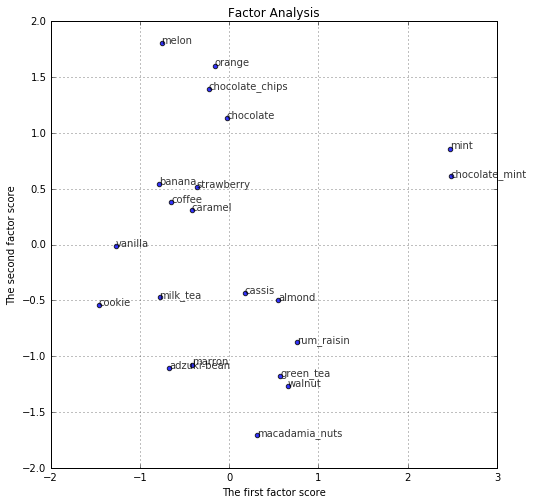

In [25]:
# 第一因子と第二因子でプロットする
plt.figure(figsize=(8, 8))
for x, y, name in zip(factors[:, 0], factors[:, 1], val_names):
    plt.text(x, y, name, alpha=0.8, size=10)
plt.scatter(factors[:, 0], factors[:, 1], alpha=0.8)
plt.title("Factor Analysis")
plt.xlabel("The first factor score")
plt.ylabel("The second factor score")
plt.grid(True)
plt.show()

<h4 style="padding: 0.25em 0.5em;color: #494949;background: transparent;border-left: solid 5px #7db4e6;">課題8.2</h4>

上と同様にして、第三因子と第四因子でプロットしてください。また、以上の結果から、アイスクリームの味の好みについて何が言えそうか考察してください。

In [ ]:
# 課題8.2

<h2 STYLE="background: #c2edff;padding: 0.5em;">アイスクリーム統計学 第８章 課題</h2>

__課題8.1__、および __課題8.2__ を解いて、指定のメールアドレスまでメールしてください。メール送信後は、エラーが帰ってきてないことを確認してください（メールアドレスを間違える人がときどき居ます）。
* 締切：11月7日（今すぐでなくても結構です）
* メールタイトル：「アイスクリーム統計学 第８章」
* 学籍番号と氏名を明記すること。
* 感想などがあれば書いてくれると嬉しいです。次回以降の講義の改善につながるかも知れません。

In [ ]:
# アイスクリーム統計学 第８章 課題

<h2 STYLE="background: #c2edff;padding: 0.5em;">終わったら、<a href="IceCreamStatistics09.ipynb">第９章：因子分析 (2)</a> に進んでください。</h2>
（2017年11月3日講義、11月7日課題提出締切）